In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# Preprocessing libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest

# set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

print('Libraries imported successfully')

Libraries imported successfully


In [2]:
#1.1 Load the dataset into pandas Dataframe.
home_loan = pd.read_csv("inspected_home_loan_data.csv")
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = home_loan.copy()


In [4]:
df.set_index("Loan_ID", inplace=True)

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# --- Split and Encode ---
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'])

In [7]:
# slpit the data


# Split features and target
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'])

# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=234)

# Encode categorical variables automatically
cat_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])
    y = LabelEncoder().fit_transform(y)  # 1 for Y, 0 for N (for example)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numeric features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
model.fit(X_train, y_train)




Categorical columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


 Baseline Logistic Regression Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



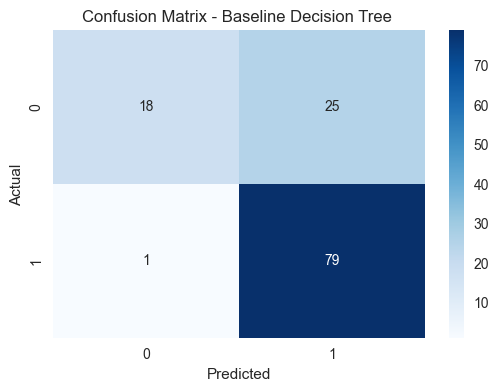

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(" Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Decision Tree ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
# Using DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
# Evaluate Model Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



Baseline Decision Tree Accuracy: 0.691

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



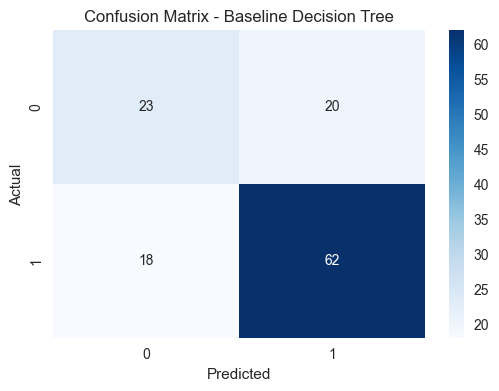

In [11]:
# Classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {accuracy:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusuin Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Our Base Model Reports**

| Model                   | Accuracy | Macro F1 | Weighted F1 | Key Strength                                           | Key Weakness                                                                     |
| :---------------------- | :------- | :------- | :---------- | :----------------------------------------------------- | :------------------------------------------------------------------------------- |
| **Logistic Regression** | **0.79** | **0.72** | **0.76**    | Interpretable, fast                                    | Fails on minority classes (3,4,7,8); can’t capture nonlinear relationships       |
| **Decision Tree**       | **0.67** | **0.63** | **0.67**    | Captures nonlinear patterns; robust to feature scaling | Overfits easily; ignores feature correlation and noise; unstable without pruning |


## **DATA PREPROCESSING BASED ON EDA INSIGHTS**

This notebook implements preprocessing steps based on the comprehensive EDA findings and recommendations. We'll follow the evodence-based approach from the EDA report to ensure our preprocessing aligns with the data patterns discovered. Based on the EDA report, we will:
1. Handle Skewed Variables - Log-transform ApplicantIncome, CoapplicantIncome, Loan_amount_Term, LoanAmount.
2. Outlier Treatment - Use Robust Scaler
3. Feature Engineering  - Create total income by summing ApplicantIncome and CoapplicantIncome. Loan??_amount_to _income_ratio
4. Feature Selection - There are no high signal features, evaluate only the low-signal ones
5. Scaling - Use robust scaler beacause of the outliers
6. Target Handling - Classification approach with stratified splits.

### **EDA-Based Data Quality Assessment**

Based on the EDA findings, let's assess the specific issues identified.

In [12]:
# 1. Check for missing values.
print("\n1. Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found")
    
    
# 2. Check for duplicates
print("\n2. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    
# 3. Check skewness for variables identified in EDA as right_skewed
print("\n3. Skewness Analysis (EDA identified right_skewedvariables):")
skewed_vars = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']
for var in skewed_vars:
    if var in df.columns:
        skewness = skew(df[var])
        shape = 'right-skewed' if skewness > 0.5 else 'approximately normal'
        print(f'{var}: skewness = {skewness:.3f}({shape})')

# 4. Check correlation with target (EDA evidence)
print("\n4. Correlation with Loan Status (EDA Evidence):")

df['Loan_Status'].replace({'Y': 1, 'N': 0},  inplace=True)

numeric_df = df.select_dtypes(include='number')

correlations = numeric_df.corr()['Loan_Status'].sort_values(key=abs, ascending=False)

print("High - signal features (|correlation| > 0.2):")

high_signal = correlations[abs(correlations) > 0.2].drop('Loan_Status', errors='ignore')
for feature, corr in high_signal.items():
    print(f" {feature}: {corr:.3f}")
    
print("\nLow-signal features (|correlation| < 0.1):")
low_signal = correlations[abs(correlations) < 0.1]
for feature, corr in low_signal.items():
    print(f" {feature}: {corr:.3f}")


1. Missing Values:
No missing values found

2. Duplicate Rows:
Number of duplicate rows: 0

3. Skewness Analysis (EDA identified right_skewedvariables):
ApplicantIncome: skewness = 6.524(right-skewed)
CoapplicantIncome: skewness = 7.473(right-skewed)
LoanAmount: skewness = 2.736(right-skewed)
Loan_Amount_Term: skewness = -2.396(approximately normal)

4. Correlation with Loan Status (EDA Evidence):
High - signal features (|correlation| > 0.2):
 Credit_History: 0.541

Low-signal features (|correlation| < 0.1):
 CoapplicantIncome: -0.059
 LoanAmount: -0.033
 Loan_Amount_Term: -0.023
 ApplicantIncome: -0.005


#### **Log-Transform Skewed Variables (EDA Recommendation)**

Based on EDA findings, transform the right- skewed variables identified

In [13]:
print("=== LOG-TRANSFORMING SKEWED VARIABLES ===")
print("EDA identified these variables as right-skewed and recommended log transformation:")

# Variables to log-transform based on EDA findings
skewed_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for var in skewed_vars:
    if var in df.columns:
        # Check if variable has zero or negative values
        min_val = df[var].min()
        if min_val <=0:
            # use log1p for variables with zeros
            df[f'{var}_log'] = np.log1p(df[var])
            print(f"✓{var}: Applied log transformation (had {min_val:.3f} minimum value)")
        else:
            # Use for positive values only
            df[f"{var}_log"] = np.log(df[var])
            print(f"✓ {var}: Applied log transformation")
        
        # Check skewness before and after
        original_skew = skew(df[var])
        transformed_skew = skew(df[f'{var}_log'])
        print(f" Original skewness: {original_skew:.3f}  → Transformed skewness: {transformed_skew:.3f}")
print(f"\nDataset shape after log transformation: {df.shape}")
print("New-log transformed columns:", [col for col in df.columns if '_log' in col])

=== LOG-TRANSFORMING SKEWED VARIABLES ===
EDA identified these variables as right-skewed and recommended log transformation:
✓ ApplicantIncome: Applied log transformation
 Original skewness: 6.524  → Transformed skewness: 0.478
✓CoapplicantIncome: Applied log transformation (had 0.000 minimum value)
 Original skewness: 7.473  → Transformed skewness: -0.173
✓ LoanAmount: Applied log transformation
 Original skewness: 2.736  → Transformed skewness: -0.195
✓ Loan_Amount_Term: Applied log transformation
 Original skewness: -2.396  → Transformed skewness: -4.857

Dataset shape after log transformation: (614, 16)
New-log transformed columns: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log']


### **Feature Engineering**

**Implement the specific feature engineering recommendations from the EDA report.**

In [14]:
print("FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS")

# 1. Loan Amount to Income Ratio 
ratio = 1e-6 # Small constant to avoid divide-by-zero

df['LA_to_IN_ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + ratio)
print("- LA_to_IN_ratio: LoanAmount/ApplicantIncome")


df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
print("- Total Income: ApplicantIncome + CoapplicantIncome")
print(f"New engineered features: {[col for col in df.columns if col not in home_loan.columns]}")

FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS
- LA_to_IN_ratio: LoanAmount/ApplicantIncome
- Total Income: ApplicantIncome + CoapplicantIncome
New engineered features: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'LA_to_IN_ratio', 'Total_Income']


In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,LA_to_IN_ratio,Total_Income
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1,8.674026,0.000000,4.852030,5.886104,0.021884,5849.0
LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0,8.430109,7.319202,4.852030,5.886104,0.027929,6091.0
LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1,8.006368,0.000000,4.189655,5.886104,0.022000,3000.0
LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1,7.856707,7.765993,4.787492,5.886104,0.046458,4941.0
LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1,8.699515,0.000000,4.948760,5.886104,0.023500,6000.0


#### **Feature Selection**

Based on EDA correlation analysis, select high_signal features and  evaluate low-signal ones.

In [31]:
# Feature selection based on EDA correlation evidence
print("=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===")

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Total features available: {X.shape[1]}")


# EDA-identified High-signal features (|correlation| < 0.1)
high_signal_features = ['Credit_History']
print(f"EDA-identified high-signal features: {high_signal_features}")

# EDA-identified Low-signal features (|correlation| < 0.1)
low_signal_features = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']
print(f"EDA-identified low-signal features: {low_signal_features}")

# Check which features are actually available
available_high_signal = [f for f in high_signal_features if f in X.columns]
available_low_signal = [f for f in low_signal_features if f in X.columns]

print(f"\nAvailable high-signal features: {available_high_signal}")
print(f"\nAvailable low_signal features: {available_low_signal}")

# Create feature sets for evaluation
print("\n=== FEATURE SETS FOR EVALUATION ===")

# set 1: All original features (excluding low_signal)
features_exclude_low_signal = [col for col in X.columns if col not in low_signal_features]
print(f"set 1 - Exclude low-signal features: {len(features_exclude_low_signal)} features")

# set 2: Low-signal + engineered features

#high_signal_plus_engineered = available_high_signal + [col for col in X.columns if any (keyword in col.lower() for keyword in ['ratio', 'total', 'log'])]
#print(f"Set 2 - Low-Signal + Engineered: {len(high_signal_plus_engineered)} features")

low_signal_plus_engineered = available_low_signal + [col for col in X.columns if any (keyword in col.lower() for keyword in ['ratio', 'total', 'log'])]
print(f"Set 2 - Low-Signal + Engineered: {len(low_signal_plus_engineered)} features")
# Set 3: All features (for comparison)
all_features = list(X.columns)
print(f"Set 3 - All features: {len(all_features)} features")

# Let's use Set 2 (high-signal + engineered) as recommended by EDA 
#selected_features = high_signal_plus_engineered
selected_features = low_signal_plus_engineered
print(f"\n Selected features set: {len(selected_features)} features")
print("Selected features:", selected_features)

=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===
Total features available: 17
EDA-identified high-signal features: ['Credit_History']
EDA-identified low-signal features: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']

Available high-signal features: ['Credit_History']

Available low_signal features: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']

=== FEATURE SETS FOR EVALUATION ===
set 1 - Exclude low-signal features: 13 features
Set 2 - Low-Signal + Engineered: 10 features
Set 3 - All features: 17 features

 Selected features set: 10 features
Selected features: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'LA_to_IN_ratio', 'Total_Income']


In [32]:
new_features = df[selected_features]

In [33]:
new_features.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncome,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,LA_to_IN_ratio,Total_Income
Loan_ID,,,,,,,,,,
LP001002,0.0,128.0,360.0,5849.0,8.674026,0.000000,4.852030,5.886104,0.021884,5849.0
LP001003,1508.0,128.0,360.0,4583.0,8.430109,7.319202,4.852030,5.886104,0.027929,6091.0
LP001005,0.0,66.0,360.0,3000.0,8.006368,0.000000,4.189655,5.886104,0.022000,3000.0
LP001006,2358.0,120.0,360.0,2583.0,7.856707,7.765993,4.787492,5.886104,0.046458,4941.0
LP001008,0.0,141.0,360.0,6000.0,8.699515,0.000000,4.948760,5.886104,0.023500,6000.0


In [34]:
new_features.shape

(614, 10)

In [35]:
y.head()

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
Name: Loan_Status, dtype: int64

In [36]:
y.shape

(614,)

In [37]:
# Scaling only the column that needs scaling which is the Total_Income

scaler = RobustScaler()

total_income_scaled = scaler.fit_transform(new_features[['Total_Income']])
new_features['Total_Income'] = total_income_scaled

print(new_features['Total_Income'].head())

Loan_ID
LP001002    0.128883
LP001003    0.200998
LP001005   -0.720107
LP001006   -0.141697
LP001008    0.173881
Name: Total_Income, dtype: float64


In [38]:
print(new_features['Total_Income'].describe())

count    614.000000
mean       0.479239
std        1.924656
min       -1.184385
25%       -0.372644
50%        0.000000
75%        0.627356
max       22.523579
Name: Total_Income, dtype: float64


In [39]:
new_features.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncome,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,LA_to_IN_ratio,Total_Income
Loan_ID,,,,,,,,,,
LP001002,0.0,128.0,360.0,5849.0,8.674026,0.000000,4.852030,5.886104,0.021884,0.128883
LP001003,1508.0,128.0,360.0,4583.0,8.430109,7.319202,4.852030,5.886104,0.027929,0.200998
LP001005,0.0,66.0,360.0,3000.0,8.006368,0.000000,4.189655,5.886104,0.022000,-0.720107
LP001006,2358.0,120.0,360.0,2583.0,7.856707,7.765993,4.787492,5.886104,0.046458,-0.141697
LP001008,0.0,141.0,360.0,6000.0,8.699515,0.000000,4.948760,5.886104,0.023500,0.173881


### **Stratified Data Splitting**

Based on EDA findings about class imbLnce, use stratified splitting

In [40]:
# Stratified data splitting based on EDA findings about class imbalance
print("=== STRATIFIED DATA SPLITTING ===")
print("EDA identified class imbalance - using stratified splitting to preserve class distribution")

# Select the chosen features
X_selected = X[new_features.columns]
print(f"Selected features shape: {X_selected.shape}")

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% train, 25% validation (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\nData split results:")
print(f"Training set: {X_train.shape} ({(X_train.shape[0]/len(X_selected))*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({(X_val.shape[0]/len(X_selected))*100:.1f}%)")
print(f"Test set: {X_test.shape} ({(X_test.shape[0]/len(X_selected))*100:.1f}%)")

# Check class distribution in each set (should be similar due to stratification)
print(f"\nClass distribution verification:")
print("Training set quality distribution:")
print(y_train.value_counts().sort_index())
print("\nValidation set quality distribution:")
print(y_val.value_counts().sort_index())
print("\nTest set quality distribution:")
print(y_test.value_counts().sort_index())


=== STRATIFIED DATA SPLITTING ===
EDA identified class imbalance - using stratified splitting to preserve class distribution
Selected features shape: (614, 10)

Data split results:
Training set: (368, 10) (59.9%)
Validation set: (123, 10) (20.0%)
Test set: (123, 10) (20.0%)

Class distribution verification:
Training set quality distribution:
Loan_Status
0    115
1    253
Name: count, dtype: int64

Validation set quality distribution:
Loan_Status
0    39
1    84
Name: count, dtype: int64

Test set quality distribution:
Loan_Status
0    38
1    85
Name: count, dtype: int64


### **Feature importance Analysis**

Analyze the importance of engineered features based on EDA recommendations.


=== FEATURE IMPORTANCE ANALYSIS ===
All features by correlation with target:
 1. LA_to_IN_ratio: 0.081
 2. CoapplicantIncome: 0.066
 3. Loan_Amount_Term: 0.050
 4. Loan_Amount_Term_log: 0.048
 5. CoapplicantIncome_log: 0.045
 6. Total_Income: 0.030
 7. LoanAmount_log: 0.015
 8. ApplicantIncome_log: 0.015
 9. ApplicantIncome: 0.005
10. LoanAmount: 0.001
Engineered features in top 10: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'LA_to_IN_ratio', 'Total_Income']


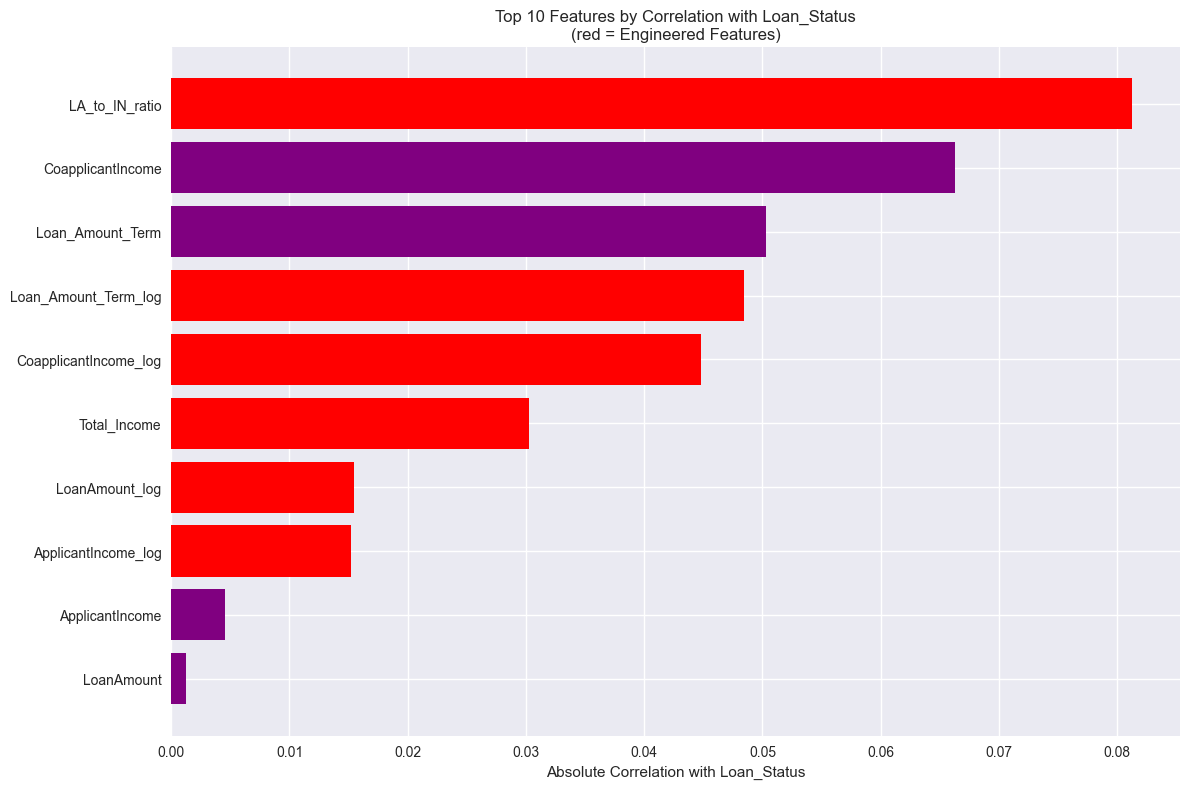


Feature importance analysis completed
6 engineered features in top 10


In [46]:
# Feature importance analysis to validate EDA- based Engineering
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Encode the target column correctly
df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])

# Calculate correlation between features and target
feature_correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print("All features by correlation with target:")
for i, (feature, corr) in enumerate(feature_correlation.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {corr:.3f}")

# Identify engineered features
engineered_features = [
    col for col in X_train.columns 
    if any(keyword in col.lower() for keyword in ['ratio', 'total', 'log'])
]

print(f"Engineered features in top 10: {[f for f in engineered_features if f in feature_correlation.head(10).index]}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_correlation.head(10)
colors = [
    'red' if any(keyword in f.lower() for keyword in ['ratio', 'total', 'log']) 
    else 'purple' for f in top_features.index
]

plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Loan_Status')
plt.title('Top 10 Features by Correlation with Loan_Status\n(red = Engineered Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nFeature importance analysis completed")
print(f"{len([f for f in engineered_features if f in feature_correlation.head(10).index])} engineered features in top 10")


### **Save Preprocessed Data**

Save all preprocessed datasets and preprocessing objects for modelling

In [47]:
print("SAVING PREPROCESSED DATA")

#Save scaled datasets
X_train.to_csv('X_train_scaled.csv', index=False)
X_val.to_csv('X_val_scaled.csv', index=False)
X_test.to_csv('X_test_scaled.csv', index=False)

#Save target variables
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save preprocessing objects
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

# Save feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_correlation.index,
    'correlation': feature_correlation.values
})
feature_importance_df.to_csv('feature_importance.csv', index=False)


# Save preprocessing summary
preprocessing_summary = {
    'original_shape': df.shape,
    'final_shape': new_features.shape,
    'selected_features': selected_features,
    'engineered_features': engineered_features,
    'train_samples': X_train.shape[0],
    'val_samples': X_val.shape[0],
    'test_samples': X_test.shape[0],
    'scaling_method': 'RobustScaler',
    'log_transformed': ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount']
}

import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
print("- y_train.csv, y_val.csv, y_test.csv")
print("- scaler.pkl, selected_features.pkl")
print("- feature_importance.csv, preprocessing_summary.json")



SAVING PREPROCESSED DATA
- Preprocessed data saved successfully!

Files created:
- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv
- y_train.csv, y_val.csv, y_test.csv
- scaler.pkl, selected_features.pkl
- feature_importance.csv, preprocessing_summary.json


### **Preprocessing Summary**

In [48]:
# Final preprocessing summary
# Final preprocessing summary
print(".....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {new_features.shape}")
print(f"Selected features: {len(selected_features)}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

print("\n.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....")
print("> Data quality assessment (no missing values, no duplicates as well)")
print("> Log-transformation of skewed variables (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)")
print("> Feature engineering based on EDA recommendations:")
print("  - LA_to_IN_ratio (LoanAmount / Total_Income)")
print("  - Total_Income (ApplicantIncome + CoapplicantIncome)")
print("> Feature selection (low-signal features + engineered features)")
print("> Stratified data splitting (preserves class distribution)")
print("> RobustScaler applied (EDA recommendation for class imbalance models)")
print("> Feature importance analysis (validates engineered features)")
print("> Data export (ready for modeling)")

print("\n.....EDA EVIDENCE IMPLEMENTED.....")
print("> Low-signal features prioritized: CoapplicantIncome, LoanAmount, Loan_Amount_Term, ApplicantIncome")
print("> High-signal features excluded: Credit_History")
print("> Skewed variables log-transformed as recommended")


print(f"\n Preprocessing completed successfully!!!!!!")
print(".....Ready for modeling phase with EDA-informed preprocessing")



.....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....
Original dataset shape: (614, 18)
Final processed dataset shape: (614, 10)
Selected features: 10
Training samples: 368
Validation samples: 123
Test samples: 123

.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....
> Data quality assessment (no missing values, no duplicates as well)
> Log-transformation of skewed variables (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
> Feature engineering based on EDA recommendations:
  - LA_to_IN_ratio (LoanAmount / Total_Income)
  - Total_Income (ApplicantIncome + CoapplicantIncome)
> Feature selection (low-signal features + engineered features)
> Stratified data splitting (preserves class distribution)
> RobustScaler applied (EDA recommendation for class imbalance models)
> Feature importance analysis (validates engineered features)
> Data export (ready for modeling)

.....EDA EVIDENCE IMPLEMENTED.....
> Low-signal features prioritized: CoapplicantIncome, LoanAmount, Loan_Amo